In [3]:
!pip install yfinance
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 7.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

Enter the stock ticker symbols separated by comma: MSFT, AAPL
Enter the inicial date like: 2010-1-1: 2021-1-1
Enter the final date like: 2010-1-1: 2023-1-1
[*********************100%***********************]  1 of 1 completed


Average Daily Return (%):
0.039582300227961616
Average Anual Return (%):
9.974739657446326


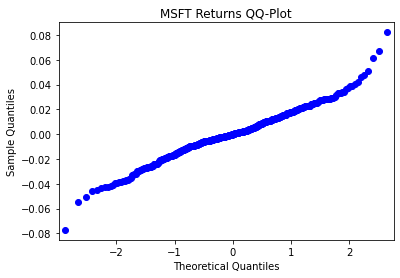

[*********************100%***********************]  1 of 1 completed


Average Daily Return (%):
0.021990680649727104
Average Anual Return (%):
5.54165152373123


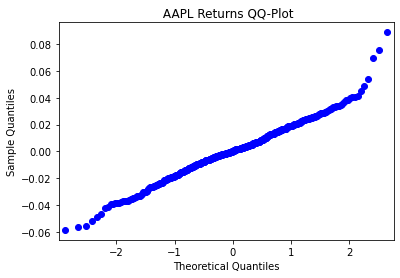

In [5]:
import pandas as pd
import plotly.express as px
import yfinance as yf
import plotly.graph_objs as go
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Função para fazer a requisição das ações a serem analisadas e plotar seus gráficos
def risk_analysis(tickers):
    color_palette = px.colors.qualitative.Dark24
    for i, ticker in enumerate(tickers):
        # Fazendo a requisição e crinado o DataFrame
        stock_data = yf.download(ticker, start=start_date, end=end_date)
        
        # Criando a coluna com os retornos diários
        stock_data['returns'] = stock_data['Adj Close'].pct_change()
        
        # Plotando o preço de fechamento ajsutado
        fig = go.Figure(data=go.Scatter(x=stock_data.index, y=stock_data['Adj Close'], 
                        mode='lines', line=dict(color=color_palette[i % len(color_palette)])))
        fig.update_layout(title=f"{ticker} Stock Price")
        fig.show()
        
        # Plotando o gráfico com os retornos diários
        fig = go.Figure(data=go.Scatter(x=stock_data.index, y=stock_data['returns'], 
                        mode='lines', line=dict(color=color_palette[i % len(color_palette)])))
        fig.update_layout(title=f"{ticker}  Daily Return")
        fig.show()
        # Printando as médias de retorno diário e anual
        print('Average Daily Return (%):')
        print(stock_data['returns'].mean()*100)
        print('Average Anual Return (%):')
        print(stock_data['returns'].mean()*252*100)
        
        # Plotando o histograma de retornos com a linha de distribuição normal
        fig = go.Figure()
        fig.add_trace(go.Histogram(x=stock_data['returns'], nbinsx=50, name='Returns', 
                                   marker=dict(color=color_palette[i % len(color_palette)])))
        mu, sigma = np.mean(stock_data['returns']), np.std(stock_data['returns'])
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        y = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2))
        fig.add_trace(go.Scatter(x=x, y=y, mode='lines', name='Normal Distribution'))
        fig.update_layout(title=f"{ticker} Returns Histogram and Normal Distribution",
                          xaxis_title='Returns', yaxis_title='Frequency')
        fig.show()    
        # Plotando o Q-Q plot
        sm.qqplot(stock_data['returns'], line='s')
        plt.title(f"{ticker} Returns QQ-Plot")
        plt.xlabel("Theoretical Quantiles")
        plt.ylabel("Sample Quantiles")
        plt.show()
# Imput dos tickers e das datas inicial e final
tickers = input("Enter the stock ticker symbols separated by comma: ").split(',')
start_date = input("Enter the inicial date like: 2010-1-1: ")
end_date = input("Enter the final date like: 2010-1-1: ")
risk_analysis(tickers)